RMSE:      19.047303012016343
Mean:      178.66406301279943
R-squared: 0.5566124701401751


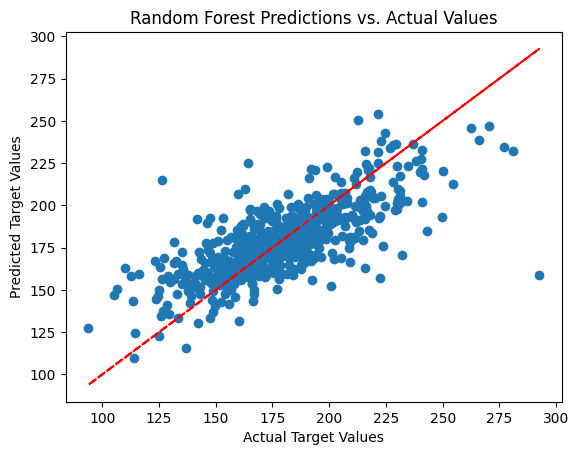

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

pd.options.mode.chained_assignment = None

#Loading
df = pd.read_csv('cancer_reg.csv', encoding='latin-1')
for i in range(len(df['binnedInc'])):
    orgVal  = df['binnedInc'][i]
    valsStr = orgVal[1:-1]
    vals    = valsStr.split(", ")
    newVal  = (float(vals[0]) + float(vals[1])) / 2 
    df['binnedInc'][i] = newVal

df = df.replace(np.nan, 0)

# Required Outcome
X = df.drop(['TARGET_deathRate', 'Geography'], axis=1) 
y = df['TARGET_deathRate']

# Impute NaN values using mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
#Scalling and Spilitting
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#=================================================================================================
# Initialize an RandomForestRegressor
rndFrst = RandomForestRegressor(max_depth=13, n_estimators=200, random_state=42)
rndFrst.fit(X_train, y_train)

# Predict on the test set
y_pred = rndFrst.predict(X_test)

# Calculate the root mean squared error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE:     ', rmse)
print('Mean:     ', np.mean(df['TARGET_deathRate']))
print('R-squared:', r2)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Random Forest Predictions vs. Actual Values')
plt.show()